# Aerofit EDA
## Intro to the Dataset and the Aim of the EDA
Aerofit a leading fitness equipment company, has multiple treadmill models in the market. For every past purchases we have data of customers (features) with us, with this data we can profile the customer for better targeting and recommendations. Additionally we will also find conditional probability of purchase of product for a given customer profile or features.

**Methods and Techniques used:** EDA and Probability (No clustering methods)

**Dataset**

The dataset contains past purchase details of 3 main treadmills of Aerofit with models KP281, KP481, and  KP781 (in order of entry level to top end) along with customer features like age, gender, education, marital status and so on.

### Library Setup

In [141]:
# Scientific libraries
import numpy as np
import pandas as pd


# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # display all interaction 

# Table styles
from custom_styles import table_styles

### Read in the Data

In [142]:
af_df = pd.read_csv("aerofit_treadmill.csv")
af_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


## Basic Exploration and Data Wrangling 

In [143]:
af_df.info()
af_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### **Understanding Features**

Column           | Description                                                                                  | Expected Data Type
-----------------|----------------------------------------------------------------------------------------------|-------------------
`product`        | 3 types of product                                                                           | category
`age`            | In years                                                                                     | int64
`gender`         | Male/Female                                                                                  | category
`education`      | In years                                                                                     | int64
`marital_status` | Single or partnered                                                                          | category
`usage`          | The average number of times the customer plans to use the treadmill each week                | int64
`fitness`        | Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape | int64
`income`         | Annual income (in $)                                                                         | int64
`miles`          | The average number of miles the customer expects to walk/run each week                       | int64

Product Portfolio:
* The KP281 is an entry-level treadmill that sells for $1,500.
* The KP481 is for mid-level runners that sell for $1,750.
* The KP781 treadmill is having advanced features that sell for $2,500.

New Features added during feature engineering:
Column      | Description                  | Expected Data Type
------------|------------------------------|-------------------
age_cat     | Categorized age groups       | category
edu_cat     | Categorized education groups | category
fitness_cat | Categorized fitness groups   | category
usage_cat   | Categorized usage groups     | category
income_cat  | Categorized income groups    | category
miles_cat   | Categorized miles groups     | category


### Data Wrangling 

**Basic sanity and preparation**
* Renamed columns to snake_case for better readability

In [144]:
# Rename columns to snake_case
af_df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
af_df.rename({'maritalstatus':'marital_status'}, axis = 1, inplace=True)
af_df.head()

,product,age,gender,education,marital_status,usage,fitness,income,miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Data Integrity and Consistency**
* Changed data type of columns to correct data type
* Data range checked and validated
* For categorical variables collapsed categories with the same or similar names and ordered categories

In [145]:
# Data Type Constraint: Constrain each variable to a specific data type, and check for mixed data types within a column.
# Datatype map for each column name
data_type_map = {
    'product': 'category',
    'age': 'int64',
    'gender': 'category',
    'education': 'int64',
    'marital_status': 'category',
    'usage': 'int64',
    'fitness': 'int64',
    'income': 'int64',
    'miles': 'int64'
}

# Convert all columns to the specified data type
af_df = af_df.astype(data_type_map)
af_df.info()
af_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product         180 non-null    category
 1   age             180 non-null    int64   
 2   gender          180 non-null    category
 3   education       180 non-null    int64   
 4   marital_status  180 non-null    category
 5   usage           180 non-null    int64   
 6   fitness         180 non-null    int64   
 7   income          180 non-null    int64   
 8   miles           180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


,age,education,usage,fitness,income,miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [146]:
# Data Range Constraints: Each variable could have a limited range of values, and check for out of range values.

# Numerical Variables
af_df.describe() # categories not included

af_df['fitness'].value_counts() # range within 1-5

,age,education,usage,fitness,income,miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [147]:
# Categorical Constraint and order: 

# Checking for categories with very low counts and uncollapsed categories
print(af_df['product'].value_counts())
print(af_df['gender'].value_counts())
print(af_df['marital_status'].value_counts())

# Setting order and renaming for category data types
af_df['product'] = af_df['product'].cat.rename_categories({'KP281':'KP281 - Entry Variant', 'KP481': 'KP481 - Mid Variant','KP781': 'KP781 - Top Variant'})
af_df['product'] = af_df['product'].cat.set_categories(['KP281 - Entry Variant', 'KP481 - Mid Variant','KP781 - Top Variant'], ordered=True)
af_df['gender'] = af_df['gender'].cat.set_categories(['Male', 'Female'], ordered=True)
af_df['marital_status'] = af_df['marital_status'].cat.set_categories(['Single', 'Partnered'], ordered=True)

product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
gender
Male      104
Female     76
Name: count, dtype: int64
marital_status
Partnered    107
Single        73
Name: count, dtype: int64


**Data Quality and Cleansing**
* No missing values found
* Outliers are found but since the numbers are high we can't remove them. Thus we will use binning or discretization strategy to reduce the effect of outliers, although this would decrease the quality of data, this is good for an EDA analysis where k-means clustering is not used.
* Number of bins suitable for the data is found and can be used to generate categorical data during feature engineering

In [148]:
# Handling Missing Data: Impute using mean or mode with or without grouping by other categories, and check for patterns in missingness.

af_df.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product         180 non-null    category
 1   age             180 non-null    int64   
 2   gender          180 non-null    category
 3   education       180 non-null    int64   
 4   marital_status  180 non-null    category
 5   usage           180 non-null    int64   
 6   fitness         180 non-null    int64   
 7   income          180 non-null    int64   
 8   miles           180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


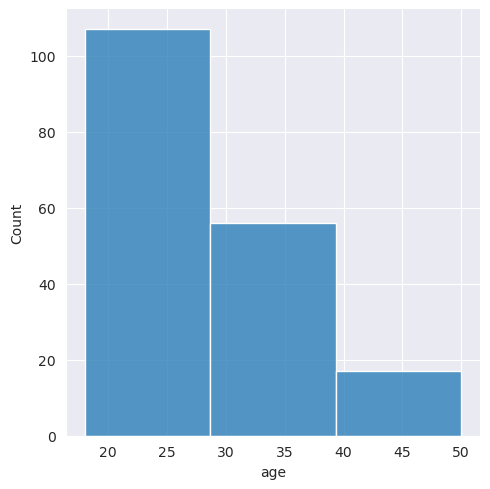

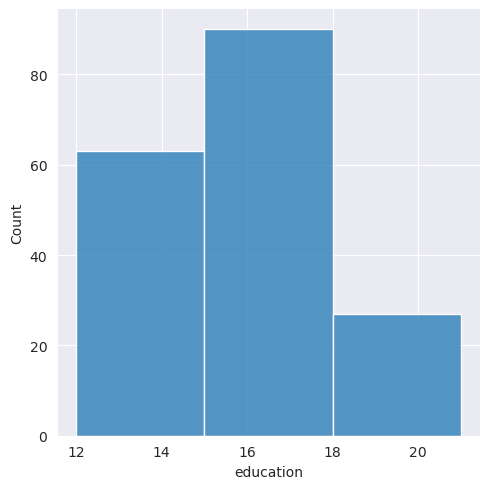

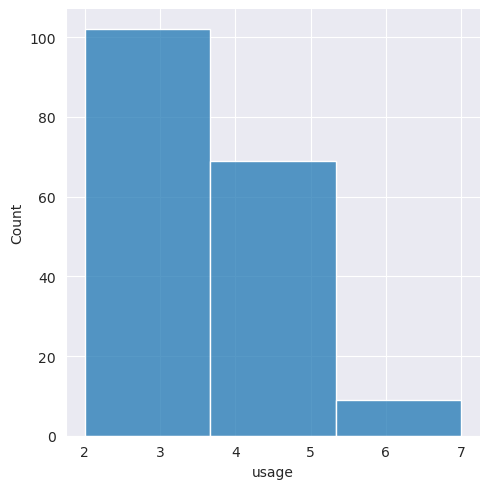

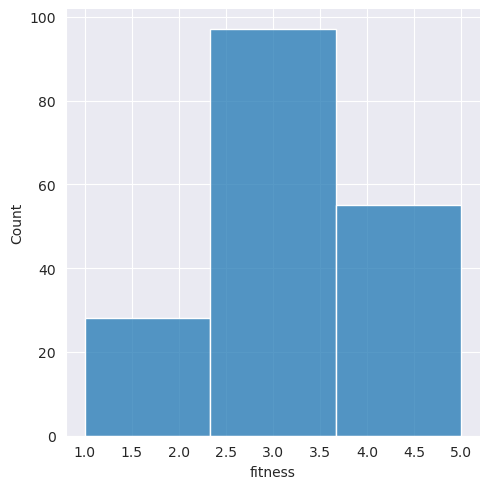

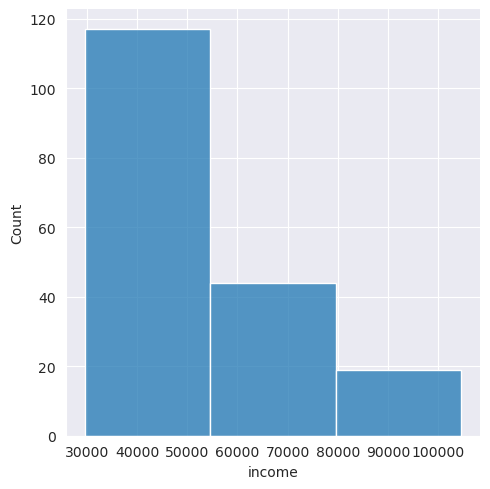

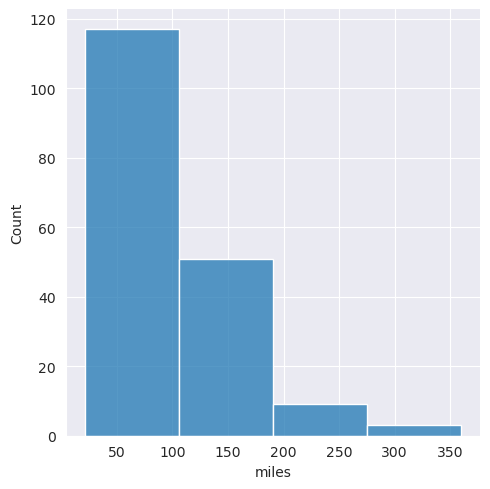

In [149]:
# Handling Outliers: Remove extreme outliers if less in number and impute if more.
# checking for outliers
sns.displot(af_df['age'], bins=3)
sns.displot(af_df['education'], bins=3)
sns.displot(af_df['usage'], bins=3)
sns.displot(af_df['fitness'], bins=3)
sns.displot(af_df['income'],bins=3)
sns.displot(af_df['miles'],bins=4) # 4th category can be collapsed later

# Above bin size will be used for feature generation


**Data Transformation and Feature Engineering**
* Generated new categorical features from numerical data with the bin size found in the previous step
* Renamed and ordered new categorical features

In [150]:
# Generating New Features: Create new features like the difference between purchase date and delivery date or segment numerical data into categorical bins.
# As per the bin size found earlier make categorical data
af_df['age_cat'] = pd.cut(af_df['age'], bins=3, ordered=True, precision=0)
af_df['edu_cat'] = pd.cut(af_df['education'], bins=3, ordered=True, precision=0)
af_df['fitness_cat'] = pd.cut(af_df['fitness'], bins=3, ordered=True, precision=0)
af_df['usage_cat'] = pd.cut(af_df['usage'], bins=3, ordered=True, precision=0)
af_df['income_cat'] = pd.cut(af_df['income']/1000, bins=3, ordered=True, precision=0)
af_df['miles_cat'] = pd.cut(af_df['miles'], bins=4, ordered=True, precision=0)

af_df.info() # datatype of new features are categories in order


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product         180 non-null    category
 1   age             180 non-null    int64   
 2   gender          180 non-null    category
 3   education       180 non-null    int64   
 4   marital_status  180 non-null    category
 5   usage           180 non-null    int64   
 6   fitness         180 non-null    int64   
 7   income          180 non-null    int64   
 8   miles           180 non-null    int64   
 9   age_cat         180 non-null    category
 10  edu_cat         180 non-null    category
 11  fitness_cat     180 non-null    category
 12  usage_cat       180 non-null    category
 13  income_cat      180 non-null    category
 14  miles_cat       180 non-null    category
dtypes: category(9), int64(6)
memory usage: 11.5 KB


In [151]:
# Renaming the categories
af_df['age_cat'] = af_df['age_cat'].cat.rename_categories(['<=29', '30-39', '>= 40'])
af_df['edu_cat'] = af_df['edu_cat'].cat.rename_categories(['<=15', '16-18', '>= 19'])
af_df['fitness_cat'] = af_df['fitness_cat'].cat.rename_categories(['low (<= 2)', 'medium (3 or 4)', 'high (5)'])
af_df['usage_cat'] = af_df['usage_cat'].cat.rename_categories(['low (<= 2)', 'medium (3 or 4)', 'high (>= 5)'])
af_df['income_cat'] = af_df['income_cat'].cat.rename_categories(['<= 55k', '56-80k', '>= 81k'])
af_df['miles_cat'] = af_df['miles_cat'].cat.rename_categories(['<= 100mi', '101-200mi', '201-300mi', '>= 301mi'])

# Collapsing 'miles_cat' to remove the 4th category which as very less count
af_df['miles_cat'] = af_df['miles_cat'].replace({'<= 100mi':'<= 100mi', '101-200mi':'101-200mi', '201-300mi':'>=200mi', '>= 301mi':'>=200mi'})



/tmp/ipykernel_941426/4097338291.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  af_df['miles_cat'] = af_df['miles_cat'].replace({'<= 100mi':'<= 100mi', '101-200mi':'101-200mi', '201-300mi':'>=200mi', '>= 301mi':'>=200mi'})


In [152]:
# checking new categorical features
for col in af_df[['age_cat', 'edu_cat', 'fitness_cat', 'usage_cat', 'income_cat', 'miles_cat']]:
    print(af_df[col].value_counts())

age_cat
<=29     107
30-39     56
>= 40     17
Name: count, dtype: int64
edu_cat
16-18    108
<=15      68
>= 19      4
Name: count, dtype: int64
fitness_cat
medium (3 or 4)    97
high (5)           55
low (<= 2)         28
Name: count, dtype: int64
usage_cat
low (<= 2)         102
medium (3 or 4)     69
high (>= 5)          9
Name: count, dtype: int64
income_cat
<= 55k    117
56-80k     44
>= 81k     19
Name: count, dtype: int64
miles_cat
<= 100mi     117
101-200mi     51
>=200mi       12
Name: count, dtype: int64


#### Assertion checks
* Data type constraint assertions
* Data range assertions
* Missing value assertions

In [153]:
# Assertions of data type constrain
assert af_df.dtypes['product'] == 'category'
assert af_df.dtypes['age'] == 'int64'
assert af_df.dtypes['gender'] == 'category'
assert af_df.dtypes['education'] == 'int64'
assert af_df.dtypes['marital_status'] == 'category'
assert af_df.dtypes['usage'] == 'int64'
assert af_df.dtypes['fitness'] == 'int64'
assert af_df.dtypes['income'] == 'int64'
assert af_df.dtypes['miles'] == 'int64'

# Assertion of data range constraints
assert af_df['fitness'].between(1, 5).all()

# Missing value assertion
assert af_df.isnull().sum().sum() == 0 # no missing values

# Assertion for newly generated features
assert af_df.dtypes['age_cat'] == 'category'
assert af_df.dtypes['edu_cat'] == 'category'
assert af_df.dtypes['fitness_cat'] == 'category'
assert af_df.dtypes['usage_cat'] == 'category'
assert af_df.dtypes['income_cat'] == 'category'
assert af_df.dtypes['miles_cat'] == 'category'

### Final data after data wrangling

In [154]:
display(af_df.head(15).style.set_table_styles(table_styles['cerulean_palette']).set_caption("Aerofit Data"))
display(af_df.describe().style.set_table_styles(table_styles['cerulean_palette']).set_caption("Aerofit Data Summary Statistics"))
af_df.info()

# Dislay value count of all categorical variables
for col in af_df[['product', 'gender', 'marital_status', 'age_cat', 'edu_cat', 'fitness_cat', 'usage_cat', 'income_cat', 'miles_cat']]:
    display(af_df[col].value_counts().to_frame().style.set_table_styles(table_styles['cerulean_palette']).set_caption(f"Value Counts of {col}"))

,product,age,gender,education,marital_status,usage,fitness,income,miles,age_cat,edu_cat,fitness_cat,usage_cat,income_cat,miles_cat
0,KP281 - Entry Variant,18,Male,14,Single,3,4,29562,112,<=29,<=15,high (5),low (<= 2),<= 55k,101-200mi
1,KP281 - Entry Variant,19,Male,15,Single,2,3,31836,75,<=29,<=15,medium (3 or 4),low (<= 2),<= 55k,<= 100mi
2,KP281 - Entry Variant,19,Female,14,Partnered,4,3,30699,66,<=29,<=15,medium (3 or 4),medium (3 or 4),<= 55k,<= 100mi
3,KP281 - Entry Variant,19,Male,12,Single,3,3,32973,85,<=29,<=15,medium (3 or 4),low (<= 2),<= 55k,<= 100mi
4,KP281 - Entry Variant,20,Male,13,Partnered,4,2,35247,47,<=29,<=15,low (<= 2),medium (3 or 4),<= 55k,<= 100mi
5,KP281 - Entry Variant,20,Female,14,Partnered,3,3,32973,66,<=29,<=15,medium (3 or 4),low (<= 2),<= 55k,<= 100mi
6,KP281 - Entry Variant,21,Female,14,Partnered,3,3,35247,75,<=29,<=15,medium (3 or 4),low (<= 2),<= 55k,<= 100mi
7,KP281 - Entry Variant,21,Male,13,Single,3,3,32973,85,<=29,<=15,medium (3 or 4),low (<= 2),<= 55k,<= 100mi
8,KP281 - Entry Variant,21,Male,15,Single,5,4,35247,141,<=29,<=15,high (5),medium (3 or 4),<= 55k,101-200mi
9,KP281 - Entry Variant,21,Female,15,Partnered,2,3,37521,85,<=29,<=15,medium (3 or 4),low (<= 2),<= 55k,<= 100mi


,age,education,usage,fitness,income,miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product         180 non-null    category
 1   age             180 non-null    int64   
 2   gender          180 non-null    category
 3   education       180 non-null    int64   
 4   marital_status  180 non-null    category
 5   usage           180 non-null    int64   
 6   fitness         180 non-null    int64   
 7   income          180 non-null    int64   
 8   miles           180 non-null    int64   
 9   age_cat         180 non-null    category
 10  edu_cat         180 non-null    category
 11  fitness_cat     180 non-null    category
 12  usage_cat       180 non-null    category
 13  income_cat      180 non-null    category
 14  miles_cat       180 non-null    category
dtypes: category(9), int64(6)
memory usage: 11.3 KB


,count
product,
KP281 - Entry Variant,80
KP481 - Mid Variant,60
KP781 - Top Variant,40


,count
gender,
Male,104
Female,76


,count
marital_status,
Partnered,107
Single,73


,count
age_cat,
<=29,107
30-39,56
>= 40,17


,count
edu_cat,
16-18,108
<=15,68
>= 19,4


,count
fitness_cat,
medium (3 or 4),97
high (5),55
low (<= 2),28


,count
usage_cat,
low (<= 2),102
medium (3 or 4),69
high (>= 5),9


,count
income_cat,
<= 55k,117
56-80k,44
>= 81k,19


,count
miles_cat,
<= 100mi,117
101-200mi,51
>=200mi,12


## Visualization and Exploration

### Bivariate Analysis

**Product vs Numerical Variables**
* Higher educated people are buying the 'KP781 - Top Variant' model
* People with usage more than 4 times a week are buying the 'KP781 - Top Variant' model
* People rated more than 4 in fitness are buying the 'KP781 - Top Variant' model
* People with income more than $60,000pa are buying the 'KP781 - Top Variant' model
* People with more than 110 miles per week are buying the 'KP781 - Top Variant' model

([0, 1, 2],
 [Text(0, 0, 'KP281 - Entry Variant'),
  Text(1, 0, 'KP481 - Mid Variant'),
  Text(2, 0, 'KP781 - Top Variant')])

([0, 1, 2],
 [Text(0, 0, 'KP281 - Entry Variant'),
  Text(1, 0, 'KP481 - Mid Variant'),
  Text(2, 0, 'KP781 - Top Variant')])

([0, 1, 2],
 [Text(0, 0, 'KP281 - Entry Variant'),
  Text(1, 0, 'KP481 - Mid Variant'),
  Text(2, 0, 'KP781 - Top Variant')])

([0, 1, 2],
 [Text(0, 0, 'KP281 - Entry Variant'),
  Text(1, 0, 'KP481 - Mid Variant'),
  Text(2, 0, 'KP781 - Top Variant')])

([0, 1, 2],
 [Text(0, 0, 'KP281 - Entry Variant'),
  Text(1, 0, 'KP481 - Mid Variant'),
  Text(2, 0, 'KP781 - Top Variant')])

([0, 1, 2],
 [Text(0, 0, 'KP281 - Entry Variant'),
  Text(1, 0, 'KP481 - Mid Variant'),
  Text(2, 0, 'KP781 - Top Variant')])

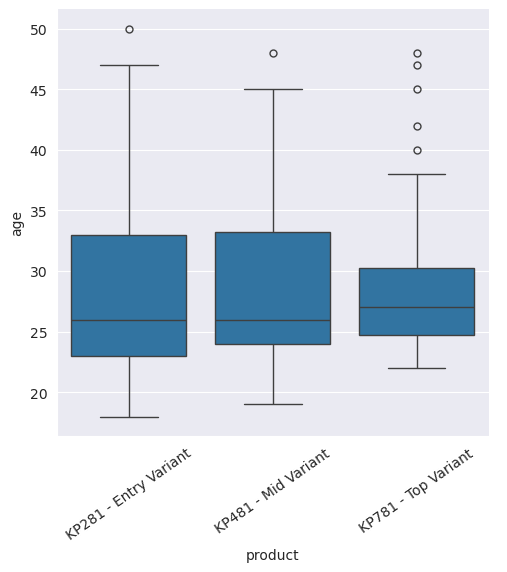

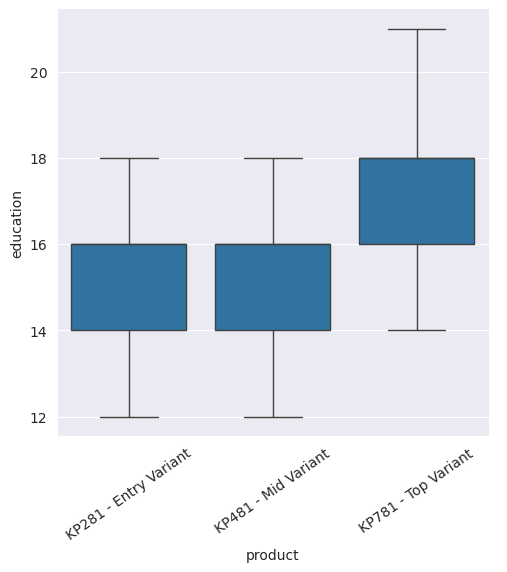

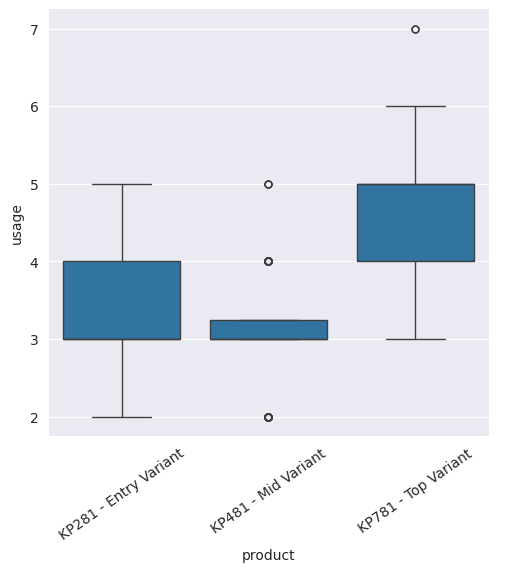

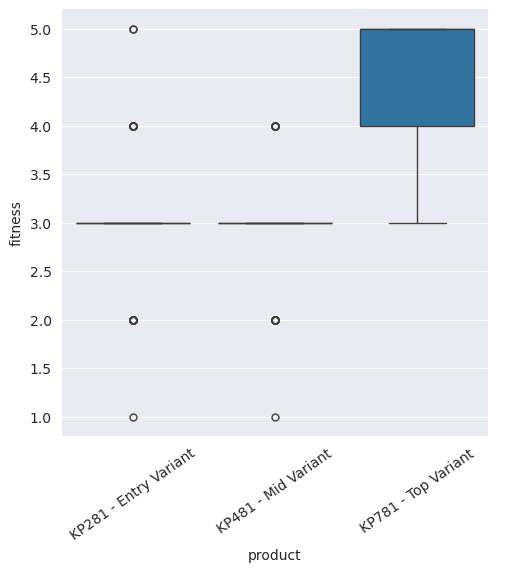

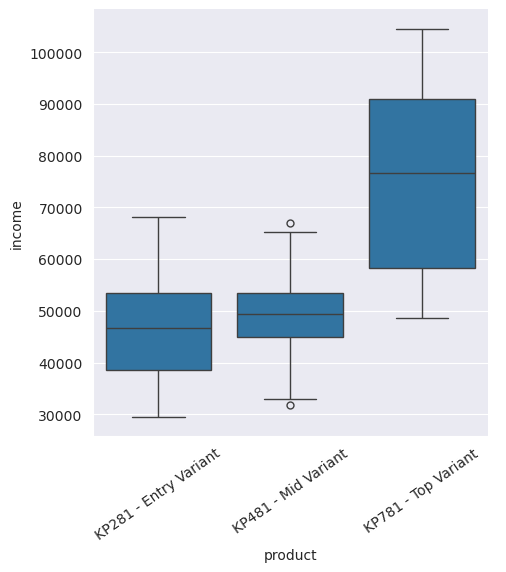

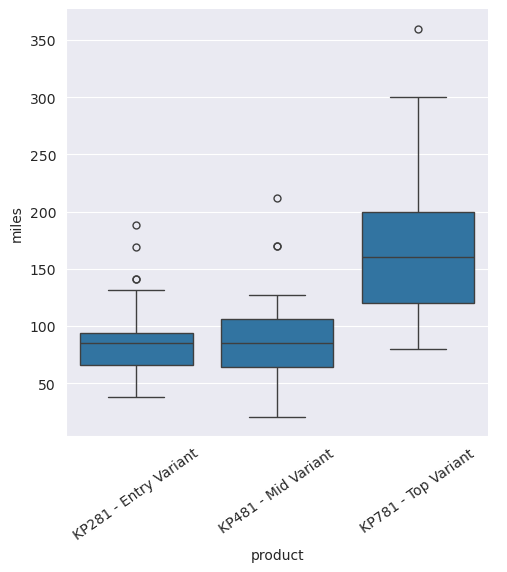

In [155]:
sns.set_style("darkgrid")
# Relationship of each numeric variable with 'product'
for feature2 in af_df.select_dtypes(include=['int64']).columns:
    sns.catplot(data =af_df, x='product', y=feature2, kind="box")
    plt.xticks(rotation=35)


**Product vs Categorical Variables**
* Feature should have differentiating marginal probability to be called as a relevant feature
* If female, then they are most likely to buy the 'Entry Variant' or 'Mid Variant' model
* Age category of '30-39' people are less likely to by the 'Top Variant' model
* Education with '>=19' people are most likely to buy the 'Top Variant' model
* Low fitness people are less likely to buy the 'Top Variant' model while high fitness people are more likely to buy it
* Low usage people are less likely to buy the 'Top Variant' model while high usage people are more likely to buy it
* Income group of '>=81k' are most likely to buy the 'Top Variant' model while '<=55k' income group are least likely to buy it
* Miles group of '>=200mi' are most likely to buy the 'Top Variant' model while '<=100mi' miles group are least likely to buy it
* Marital status is least relevant feature which do not show any significant change in product purchase

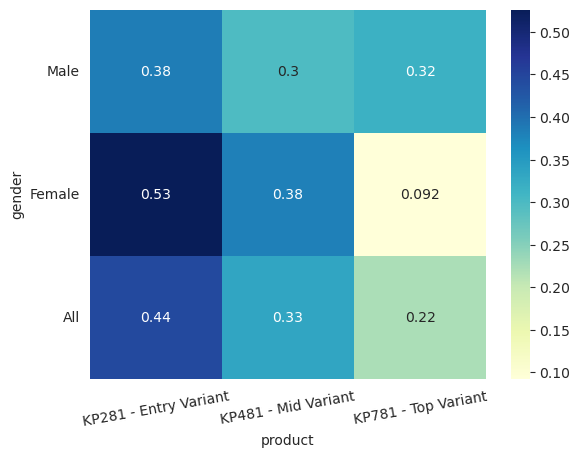

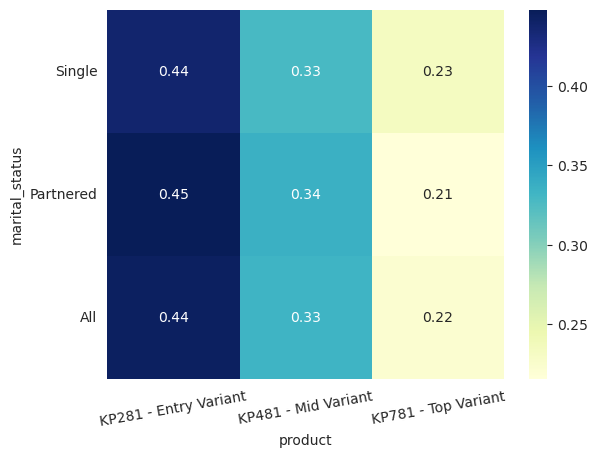

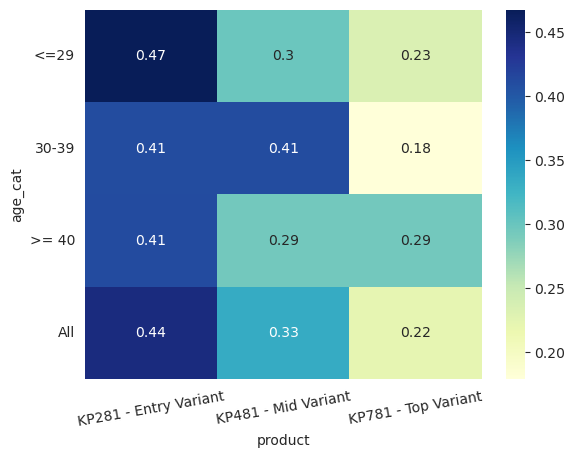

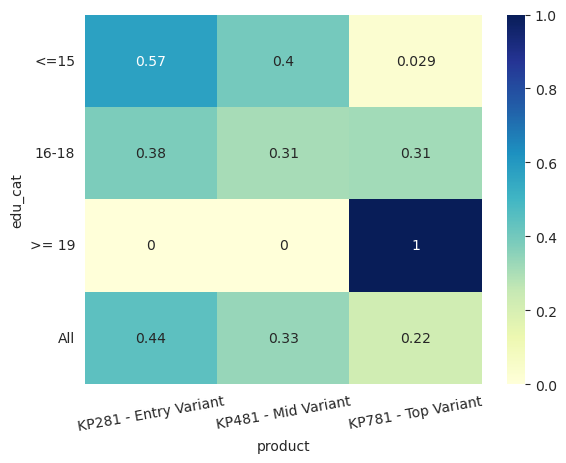

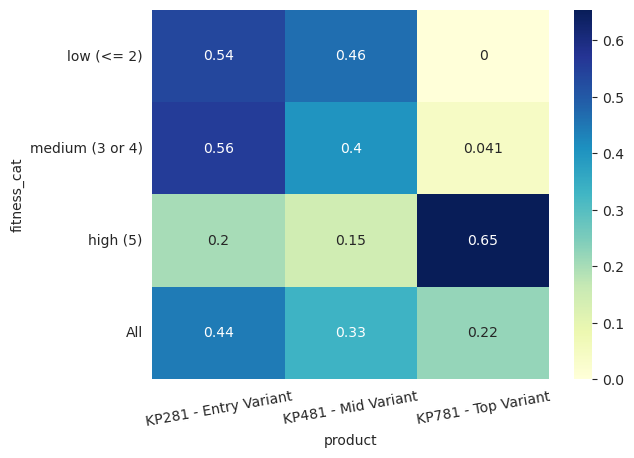

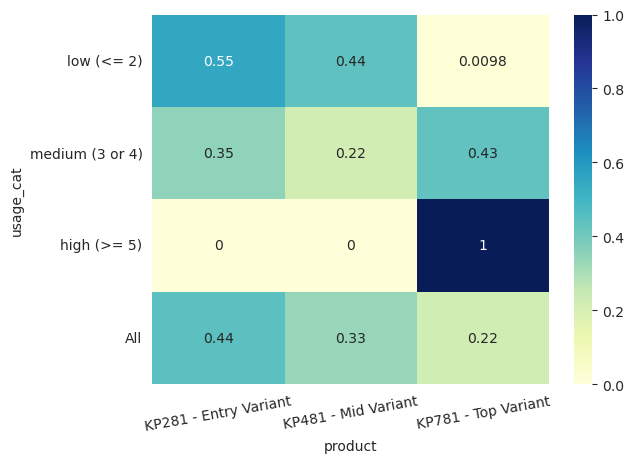

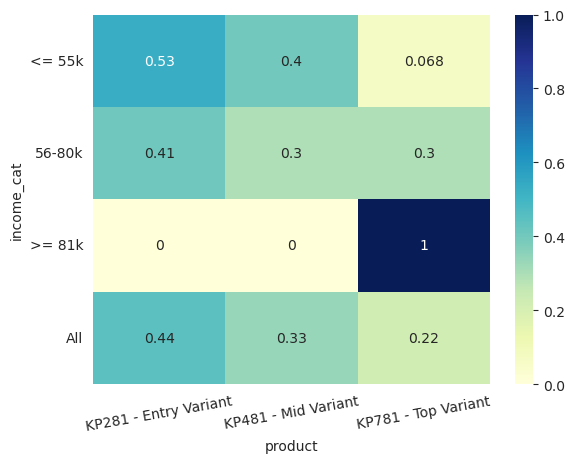

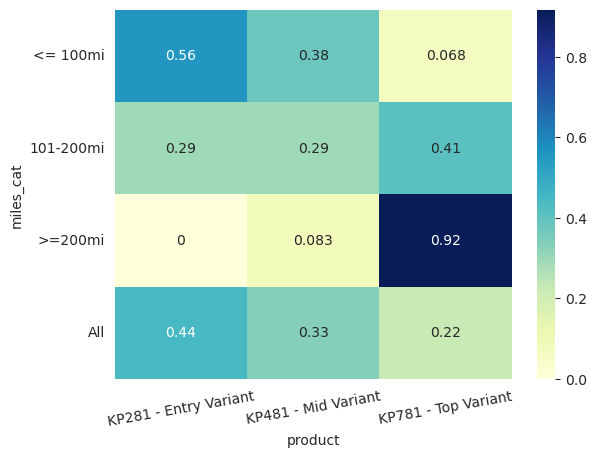

In [156]:
# same as above but using crosstab to visualize
def cross_tab_plot(feature1,feature2):
    fig, ax = plt.subplots()
    sns.heatmap(pd.crosstab(af_df[feature1], af_df[feature2],normalize='index',margins=True), # normalize='index' to get marginal probability for each category
                annot=True, 
                cmap="YlGnBu",
                ax=ax)
    plt.xticks(rotation=10)
    plt.yticks(rotation = 0)
    plt.plot()

for feature1 in af_df.select_dtypes(include=['category']).columns:
    if feature1 == 'product': continue
    cross_tab_plot(feature1,'product')

# for the features items which show drastic change w.r.t product gives clues about the customer behaviour

**More filtering to differentiate Entry,  Mid and Top Variants customer behaviour**
* For the below customer profile there is about 68% probability to buy the 'Entry Variant' model
    * Gender : Female
    * Education : <=15
    * Usage : low (<= 2)
    * Miles : <= 100mi
    * Income : <= 55k
* For the below customer profile there is about 63% probability to buy the 'Mid Variant' model
    * Age : 30-39
    * Usage : low (<= 2)
    * Miles : <= 100mi
    * Income : <= 55k
* For the below customer profile there is about 92% or above probability to buy the 'Top Variant' model
    * Gender : Male
    * Age : >= 40
    * Fitness : high (5)
    * or any one of the below listed feature in isolation
        * Income : >= 81k
        * Usage : high (>= 5)
        * Education : >= 19   

<Axes: xlabel='product', ylabel='row_0'>

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'KP281 - Entry Variant'),
  Text(1.5, 0, 'KP481 - Mid Variant'),
  Text(2.5, 0, 'KP781 - Top Variant')])

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True'), Text(0, 2.5, 'All')])

[]

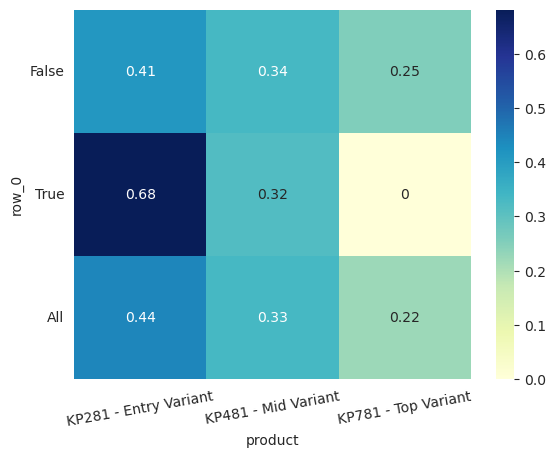

In [157]:
# As per the above analysis we can see that certain features are promising for entry product.
entry_variant_fetures = (af_df['gender'] == 'Female') \
                        & (af_df['edu_cat'] == '<=15') \
                        & (af_df['usage_cat'] == 'low (<= 2)') \
                        & (af_df['miles_cat'] == '<= 100mi') \
                        & (af_df['income_cat'] == '<= 55k')
        

sns.heatmap(pd.crosstab(entry_variant_fetures, af_df['product'],normalize='index',margins=True), # normalize='index' to get marginal probability for each category
                annot=True, 
                cmap="YlGnBu"
                )
plt.xticks(rotation=10)
plt.yticks(rotation = 0)
plt.plot()

<Axes: xlabel='product', ylabel='row_0'>

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'KP281 - Entry Variant'),
  Text(1.5, 0, 'KP481 - Mid Variant'),
  Text(2.5, 0, 'KP781 - Top Variant')])

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True'), Text(0, 2.5, 'All')])

[]

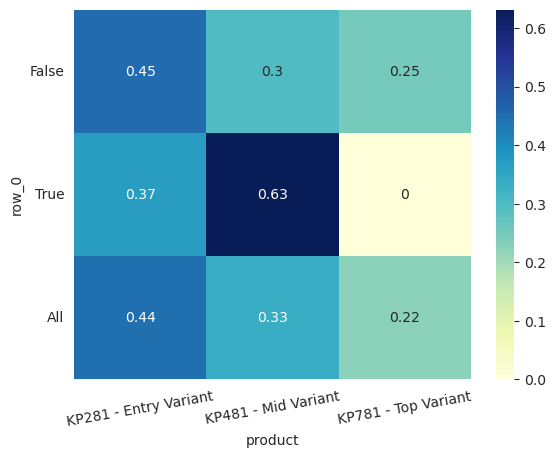

In [158]:
# As per the above analysis we can see that certain features are promising for Mid variant product.
entry_variant_fetures = (af_df['age_cat'] == '30-39') \
                        & (af_df['usage_cat'] == 'low (<= 2)') \
                        & (af_df['miles_cat'] == '<= 100mi')\
                        & (af_df['income_cat'] == '<= 55k')

sns.heatmap(pd.crosstab(entry_variant_fetures, af_df['product'],normalize='index',margins=True), # normalize='index' to get marginal probability for each category
                annot=True, 
                cmap="YlGnBu"
                )
plt.xticks(rotation=10)
plt.yticks(rotation = 0)
plt.plot()

<Axes: xlabel='product', ylabel='row_0'>

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'KP281 - Entry Variant'),
  Text(1.5, 0, 'KP481 - Mid Variant'),
  Text(2.5, 0, 'KP781 - Top Variant')])

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True'), Text(0, 2.5, 'All')])

[]

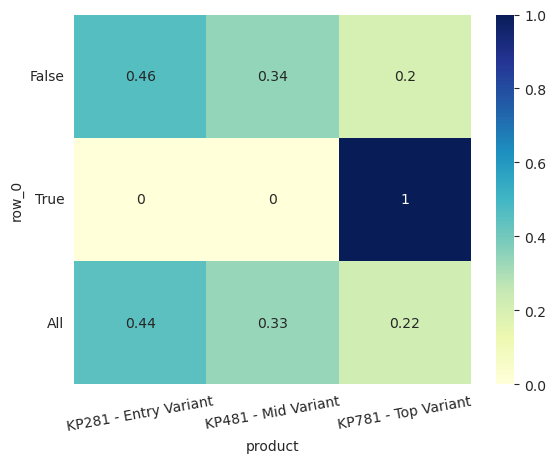

In [159]:
# As per the above analysis we can see that certain features are promising for Top product.
entry_variant_fetures = (af_df['gender'] == 'Male') \
                        & (af_df['age_cat'] == '>= 40') \
                        & (af_df['fitness_cat'] == 'high (5)')
        

sns.heatmap(pd.crosstab(entry_variant_fetures, af_df['product'],normalize='index',margins=True), # normalize='index' to get marginal probability for each category
                annot=True, 
                cmap="YlGnBu"
                )
plt.xticks(rotation=10)
plt.yticks(rotation = 0)
plt.plot()

**Correlation between features**
* Some correlation exist between fitness and miles (0.79) as well as usage and miles (0.76)

<Axes: >

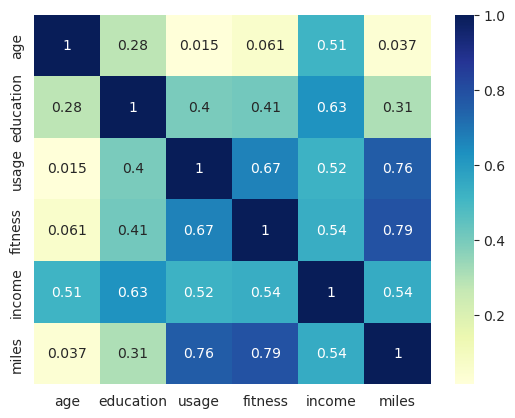

In [160]:
sns.heatmap(af_df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap="YlGnBu")

**Pairplot**
* Fitness, income and miles are good predictors for 'Top Variant'

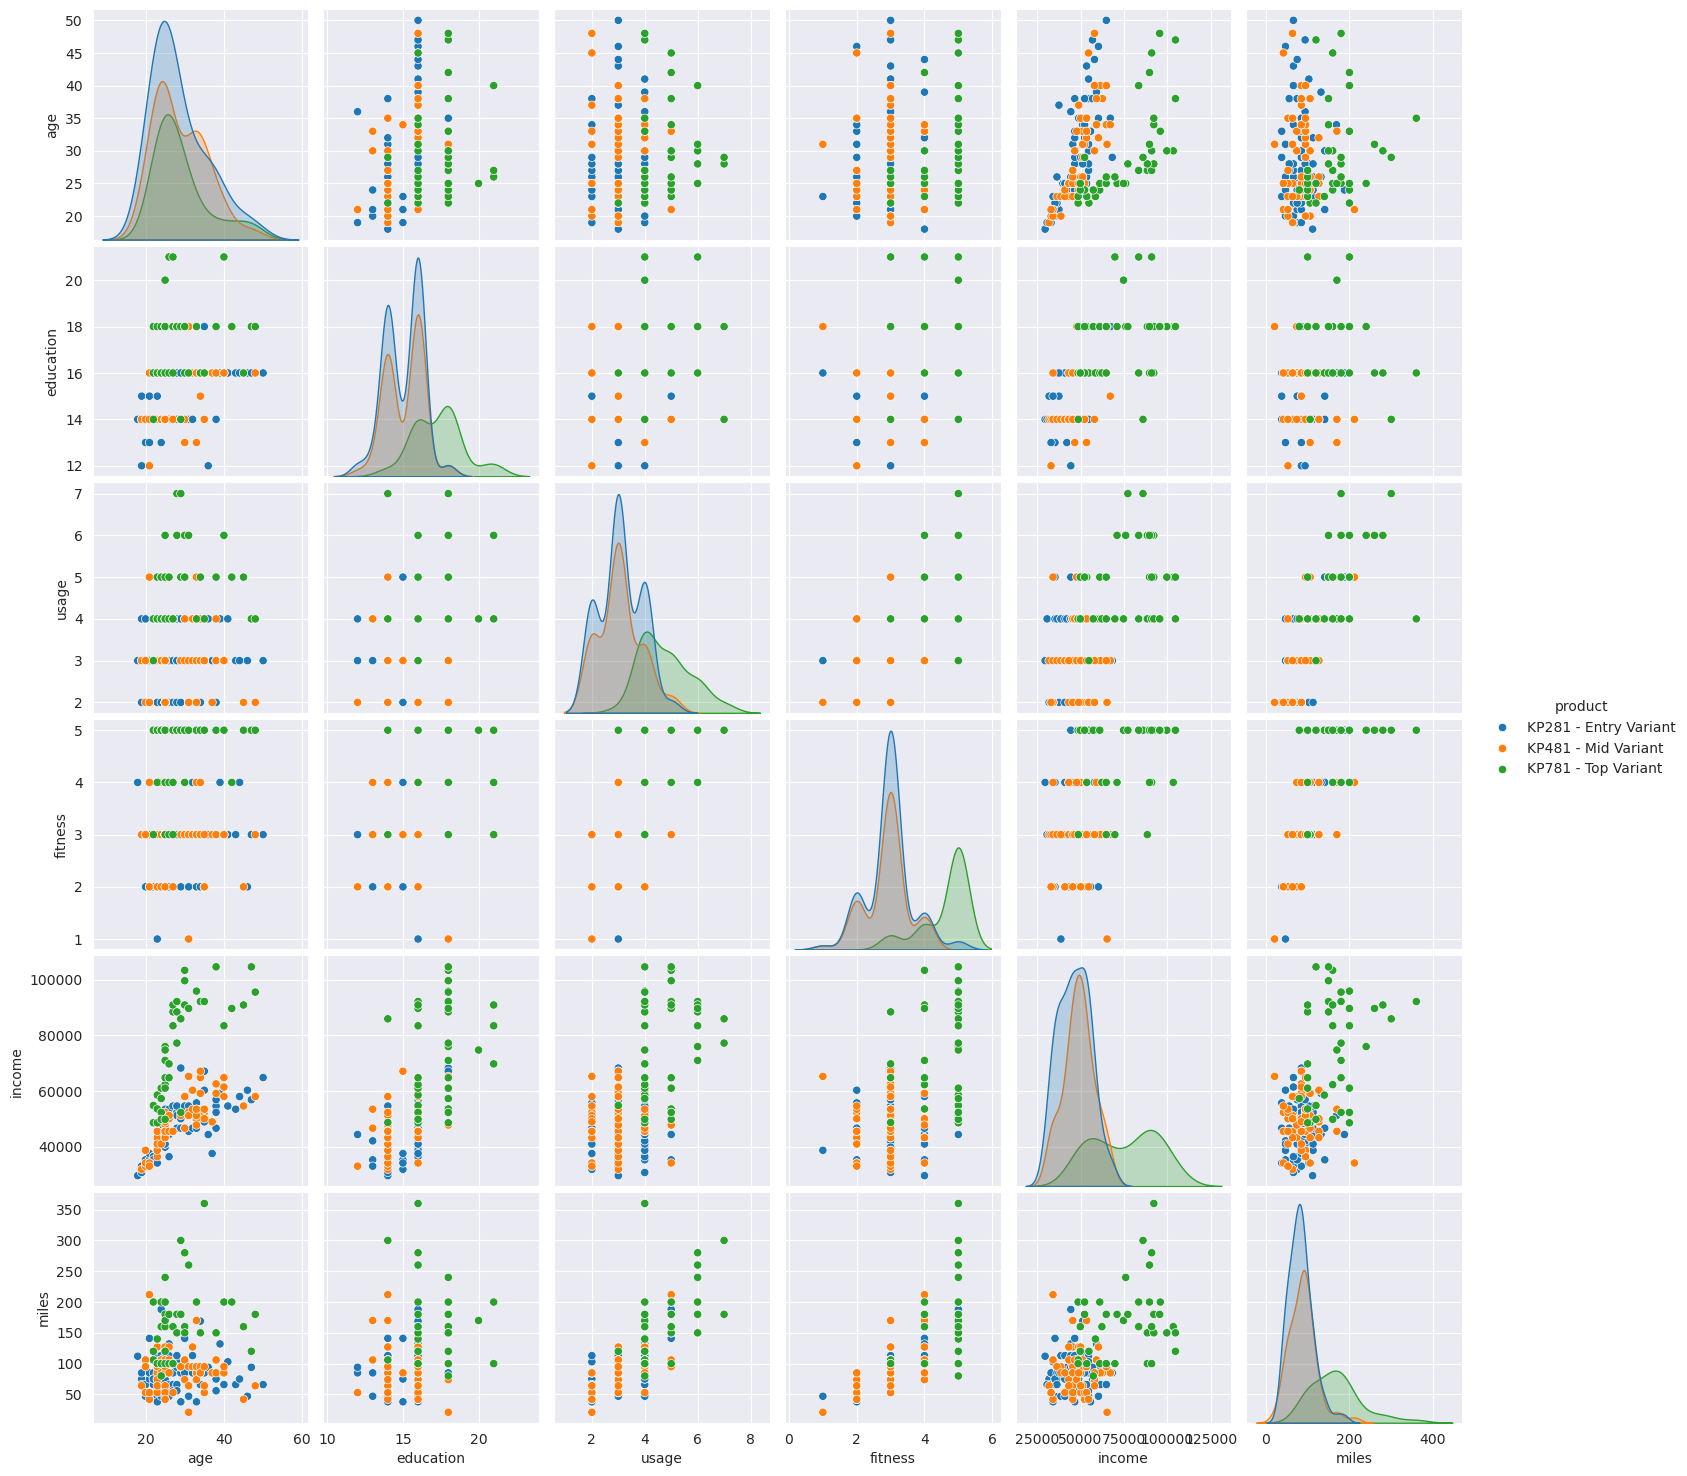

In [161]:
sns.pairplot(af_df, hue = 'product')